<a href="https://colab.research.google.com/github/parichakra/irisflower/blob/main/irisflower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white",color_codes= True)

In [ ]:
iris = pd.read_csv("Iris.csv")

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris[120:131:3]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
120,121,6.9,3.2,5.7,2.3,Iris-virginica
123,124,6.3,2.7,4.9,1.8,Iris-virginica
126,127,6.2,2.8,4.8,1.8,Iris-virginica
129,130,7.2,3.0,5.8,1.6,Iris-virginica


In [ ]:
iris['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='SepalLengthCm', ylabel='PetalWidthCm'>

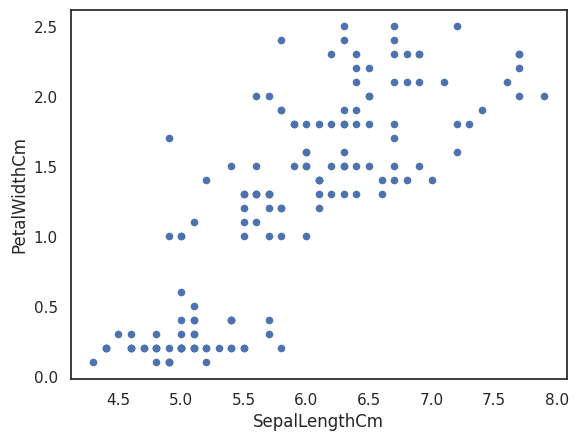

In [ ]:
iris.plot(kind="scatter", x= "SepalLengthCm", y= "PetalWidthCm")

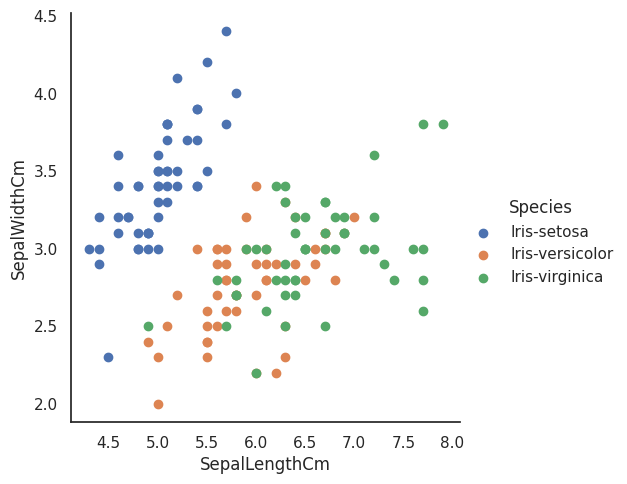

In [ ]:
sns.FacetGrid(iris, hue="Species",height=5)\
  .map(plt.scatter, "SepalLengthCm", "SepalWidthCm")\
  .add_legend()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


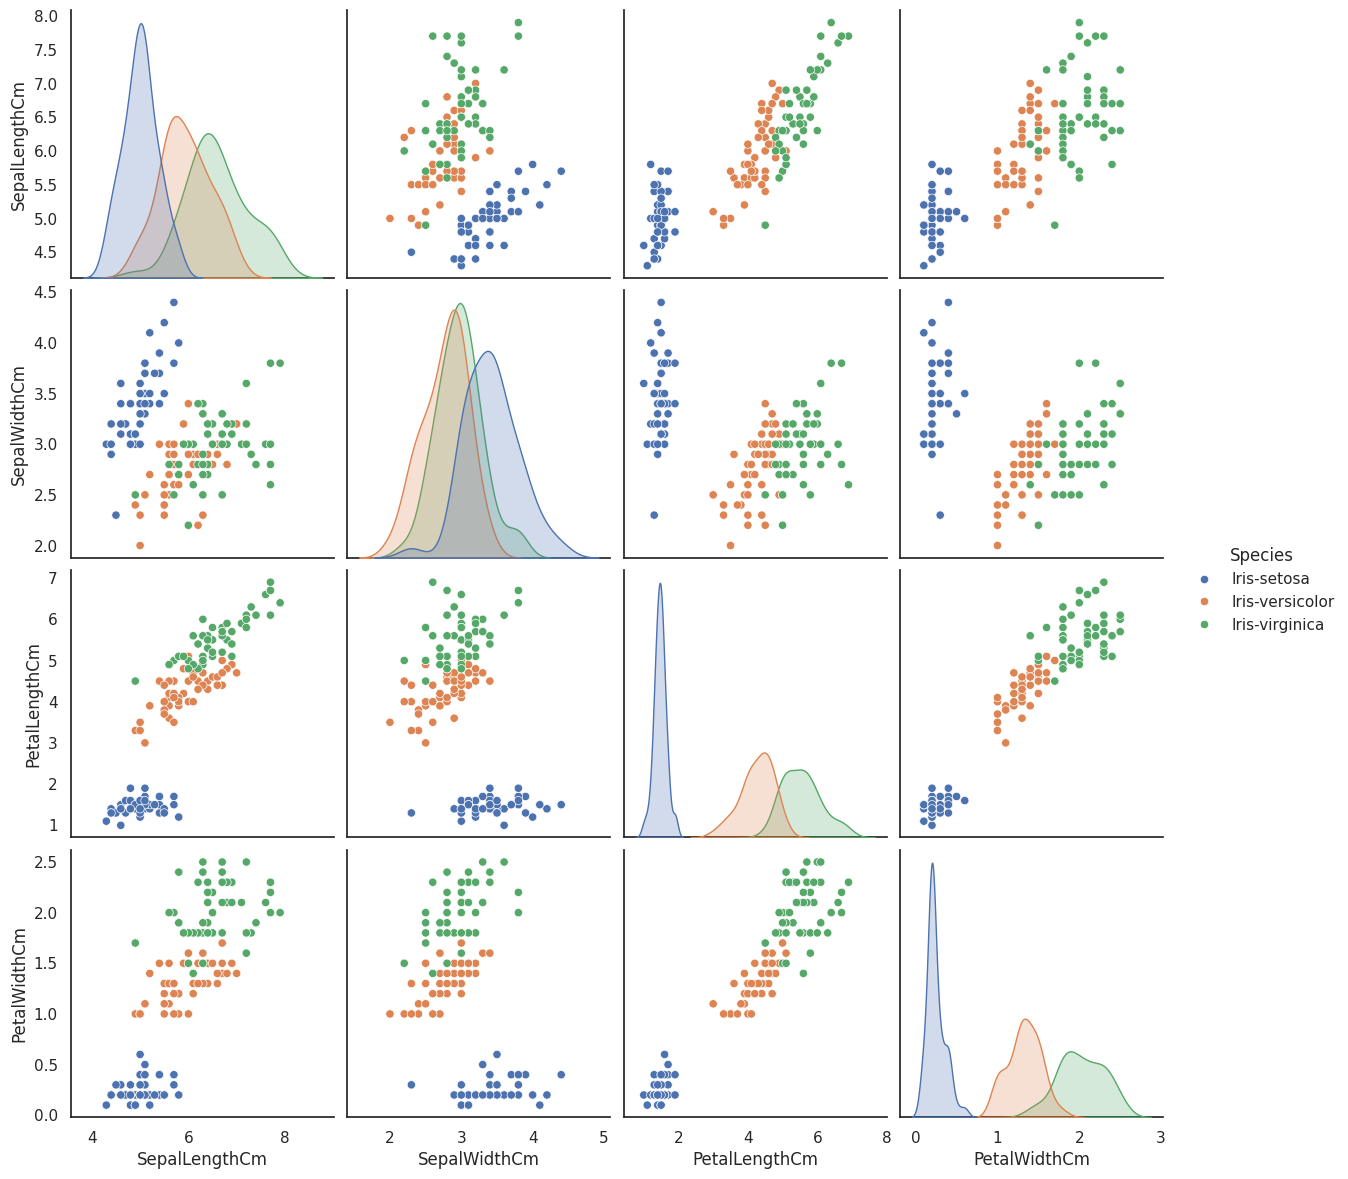

In [ ]:
sns.pairplot(iris.drop("Id",axis=1), hue= "Species", size=3)

In [ ]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris_data = iris.values
X= iris_data[:, 1:5]
Y= iris_data[:,5]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train[:5], Y_train[:5]

(array([[4.6, 3.6, 1.0, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [6.7, 3.1, 4.4, 1.4],
        [4.8, 3.4, 1.6, 0.2],
        [4.4, 3.2, 1.3, 0.2]], dtype=object),
 array(['Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
        'Iris-setosa'], dtype=object))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC



In [ ]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
predictions = LR.predict(X_test)

In [ ]:
predictions

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test,predictions)

1.0

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
import pickle

In [ ]:
with open('iris_svc.pickle', 'wb') as f:
  pickle.dump(LR,f)